### <b>XGBoost - Regression</b>

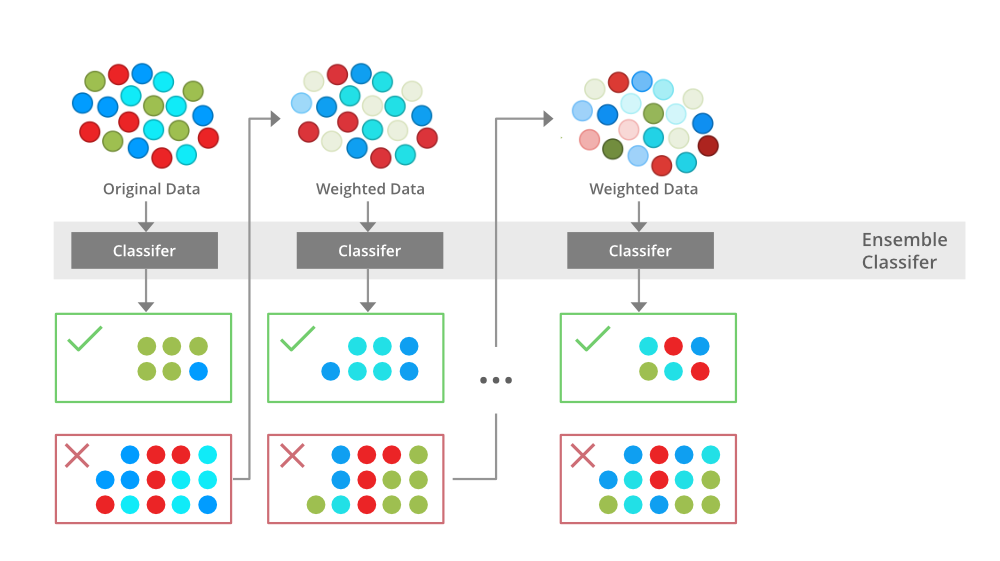
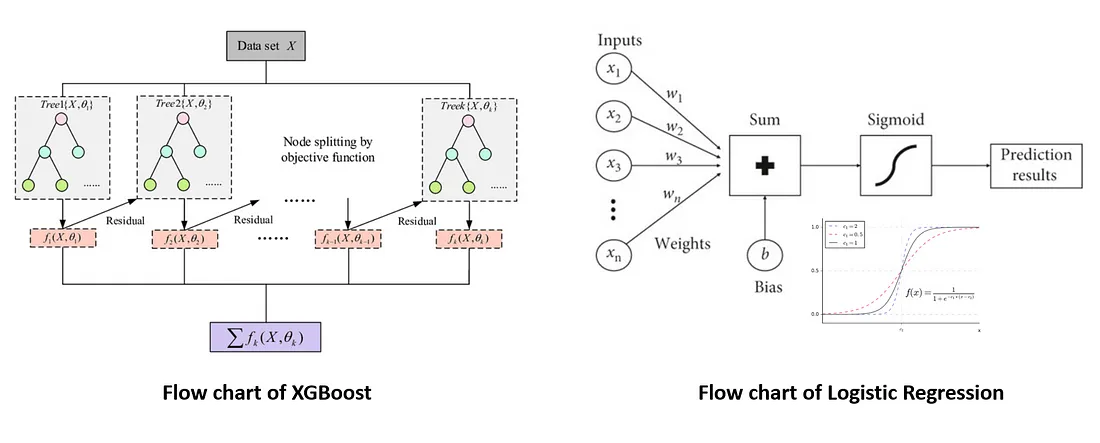

### <b>1. Importing/loading libraries</b>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### <b>2. Data preprocessing</b>

In [47]:
dataset = pd.read_csv("Data.csv")

print(f"Dataset: \n{dataset}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

for i in range(len(y)):
    if y[i] == 2:
        y[i] = 0
    else:
        y[i] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Dataset: 
     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   

In [48]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-0.49838781  1.98839518 -0.69781134 ...  0.61907387  0.34532102
  -0.33863738]
 [ 0.19242611 -1.22468404 -0.69781134 ... -0.18860673 -0.62157783
  -0.33863738]
 [-1.00461394  0.20335117 -0.69781134 ... -0.18860673 -0.62157783
  -0.33863738]
 ...
 [ 0.1853572  -1.22468404 -0.69781134 ... -0.99628733 -0.62157783
  -0.33863738]
 [ 0.3178948  -0.51066644 -0.69781134 ... -0.59244703 -0.62157783
  -0.33863738]
 [-1.05380275  1.98839518  1.90512627 ...  1.42675446  1.31221987
  -0.33863738]]

X_test: 
[[ 0.12494975 -1.22468404 -0.69781134 ... -0.99628733 -0.62157783
  -0.33863738]
 [ 0.09925676 -0.51066644 -0.69781134 ... -0.59244703 -0.62157783
  -0.33863738]
 [-0.56729485  0.20335117  0.60365746 ...  0.21523357  0.0230214
  -0.33863738]
 ...
 [-1.06671597 -0.15365763 -0.69781134 ... -0.99628733 -0.62157783
  -0.33863738]
 [ 0.33247739 -0.15365763  2.23049348 ...  2.23443506  2.27911872
  -0.33863738]
 [ 0.06979061 -0.86767524 -0.69781134 ... -0.59244703 -0.62157783
  -0.33863738

### <b>3. Fitting/creating XGBoost classification model</b>

In [49]:
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### <b> 4. Evaluating the performance of XGBoost classifier</b>

#### <b>4.1 Default evaluation by using test set</b>

In [54]:
y_predicted = xgboost_classifier.predict(X_test)

print(f"y_predicted: \n{y_predicted}\n")

print(f"y_test: \n{y_test}\n")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"Confusion matrix: \n{confusion_matrix_result}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"Accuracy score result: {accuracy_score_result}")

y_predicted: 
[0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0]

y_test: 
[0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0]

Confusion matrix: 
[[85  2]
 [ 1 49]]

Accuracy score result: 0.9781021897810219


#### <b>4.2 k-fold Cross validation</b>

In [61]:
accuracies = cross_val_score(
    estimator = xgboost_classifier,
    X = X_train,
    y = y_train,
    cv = 10
)
for i in range(len(accuracies)):
    print(f"{i}: {accuracies[i] * 100} [%]")
print(f"Mean accuracy: {accuracies.mean() * 100} [%]")
print(f"Standard deviation: {accuracies.std() * 100} [%]")

0: 92.72727272727272 [%]
1: 96.36363636363636 [%]
2: 96.36363636363636 [%]
3: 98.18181818181819 [%]
4: 94.54545454545455 [%]
5: 100.0 [%]
6: 94.44444444444444 [%]
7: 96.29629629629629 [%]
8: 100.0 [%]
9: 98.14814814814815 [%]
Mean accuracy: 96.70707070707071 [%]
Standard deviation: 2.2797770695718875 [%]
